<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Cryptocurrency_price_forecasting/blob/main/Cryptocurrency_price_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cryptocurrencies are fast becoming rivals to traditional currency across the world. The digital currencies are available to purchase in many different places, making it accessible to everyone, and with retailers accepting various cryptocurrencies it could be a sign that money as we know it is about to go through a major change.

In addition, the blockchain technology on which many cryptocurrencies are based, with its revolutionary distributed digital backbone, has many other promising applications. Implementations of secure, decentralized systems can aid us in conquering organizational issues of trust and security that have plagued our society throughout the ages. In effect, we can fundamentally disrupt industries core to economies, businesses and social structures, eliminating inefficiency and human error.

Content
The dataset contains all historical daily prices (open, high, low, close) for all cryptocurrencies listed on CoinMarketCap.

# Connecting with the kaggle and importing the data

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Loading the data from kaggle
!kaggle datasets download -d taniaj/cryptocurrency-market-history-coinmarketcap

Dataset URL: https://www.kaggle.com/datasets/taniaj/cryptocurrency-market-history-coinmarketcap
License(s): CC0-1.0
  0% 0.00/13.4M [00:00<?, ?B/s]
100% 13.4M/13.4M [00:00<00:00, 1.57GB/s]


In [3]:
# unzipping the data
!unzip cryptocurrency-market-history-coinmarketcap.zip

Archive:  cryptocurrency-market-history-coinmarketcap.zip
  inflating: all_currencies.csv      


In [4]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('all_currencies.csv')

In [6]:
df.head(5)

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [9]:
df.tail(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
632213,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
632214,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
632215,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
632216,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0
632217,2018-09-27,ZZC,0.086664,0.130541,0.067363,0.073475,91.0,168691.0


In [10]:
df.sample(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
116084,2013-09-18,CBX,0.355617,0.373387,0.331997,0.333938,NaN,277540.0
372804,2014-09-29,NOTE,0.003761,0.003868,0.003556,0.003620,586.0,344220.0
374481,2017-12-10,NRO,0.002857,0.002973,0.002148,0.002918,291.0,109118.0
430571,2017-02-15,PXC,0.000251,0.000252,0.000251,0.000252,25.0,12796.0
428024,2016-12-07,PUT,0.000657,0.000756,0.000483,0.000584,232.0,65222.0


In [11]:
df['Symbol'].value_counts()

,count
Symbol,
BTC,1979
NMC,1979
LTC,1979
NVC,1978
PPC,1978
...,...
MNP,2
PHON,2
DACH,2


In [12]:
df.shape

(632218, 8)

In [13]:
df.isna().sum()

,0
Date,0
Symbol,0
Open,0
High,0
Low,0
Close,0
Volume,5335
Market Cap,64377


In [14]:
#removing null value
df.dropna(inplace=True)

In [15]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562506 entries, 29 to 632217
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        562506 non-null  object 
 1   Symbol      562506 non-null  object 
 2   Open        562506 non-null  float64
 3   High        562506 non-null  float64
 4   Low         562506 non-null  float64
 5   Close       562506 non-null  float64
 6   Volume      562506 non-null  float64
 7   Market Cap  562506 non-null  float64
dtypes: float64(6), object(2)
memory usage: 38.6+ MB


In [17]:
#setting date column to date time
df.Date = pd.to_datetime(df.Date)

In [18]:
# setting date column as index
df = df.set_index('Date')
df.sample(5)

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2014-07-10,DMD,0.170515,0.190300,0.165633,0.169239,343.0,81778.0
2017-04-15,NEVA,0.009923,0.011664,0.009781,0.010305,692.0,16022.0
2014-08-21,PIGGY,0.000029,0.000031,0.000026,0.000026,77.0,13929.0
2014-10-14,BBR,0.159729,0.186661,0.156431,0.166636,3065.0,4145.0
2016-03-14,SOIL,0.018751,0.022471,0.015734,0.022471,2036.0,63403.0


In [19]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,5.625060e+05,5.625060e+05,5.625060e+05,5.625060e+05,5.625060e+05,5.625060e+05
mean,1.748373e+02,2.069828e+02,1.438328e+02,1.726718e+02,1.044673e+07,2.494647e+08
std,8.294175e+03,1.084154e+04,6.151075e+03,8.156668e+03,2.192210e+08,4.474738e+09
min,7.100000e-09,7.600000e-09,3.000000e-09,7.100000e-09,0.000000e+00,0.000000e+00
25%,8.720000e-04,1.006000e-03,7.620000e-04,8.730000e-04,6.000000e+01,3.754600e+04
50%,1.013750e-02,1.155400e-02,8.934000e-03,1.012500e-02,7.590000e+02,2.520820e+05
75%,1.183028e-01,1.330790e-01,1.061602e-01,1.182267e-01,1.550800e+04,2.444712e+06
max,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261413e+11


#Data Visulaization

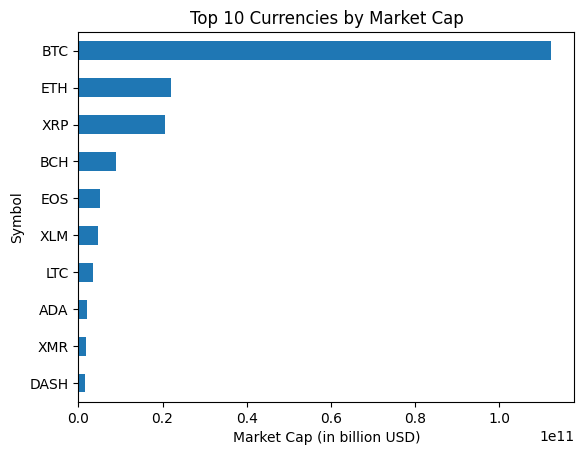

In [20]:
# Plotting top 10 verical bar plot
ax = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");
plt.ylabel('Symbol')
plt.xlabel('Market Cap (in billion USD)')
plt.show()

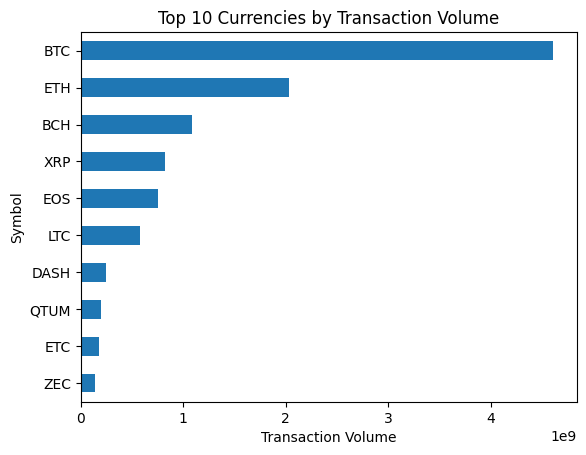

In [21]:
# Plotting top 10 verical bar plot
ax = df.groupby(['Symbol'])['Volume'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume");
plt.title("Top 10 Currencies by Transaction Volume");
plt.ylabel('Symbol')
plt.show()

In [22]:
# the top5 currency by market cap data
top_5_currency_names = df.groupby(['Symbol'])['Market Cap'].last().sort_values(ascending=False).head(5).index
top_5_currency_data = df[df['Symbol'].isin(top_5_currency_names)]
top_5_currency_data.head(5)




,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2017-08-02,BCH,382.38,756.93,309.33,452.66,416207008.0,6.302362e+09
2017-08-03,BCH,448.49,519.28,364.05,364.05,161518000.0,7.392028e+09
2017-08-04,BCH,362.18,386.93,233.05,233.05,185038000.0,5.969723e+09
2017-08-05,BCH,231.11,273.04,200.98,213.15,144043008.0,3.809333e+09
2017-08-06,BCH,212.18,223.70,203.45,220.66,107606000.0,3.497291e+09


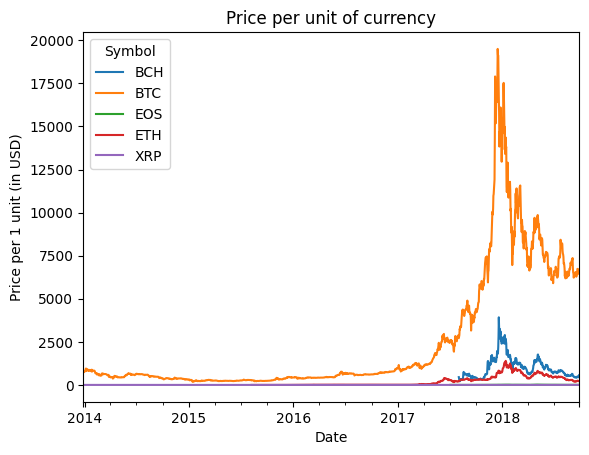

In [23]:
# Price per unit of top 5 currency
ax = top_5_currency_data.groupby(['Date', 'Symbol'])['Close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

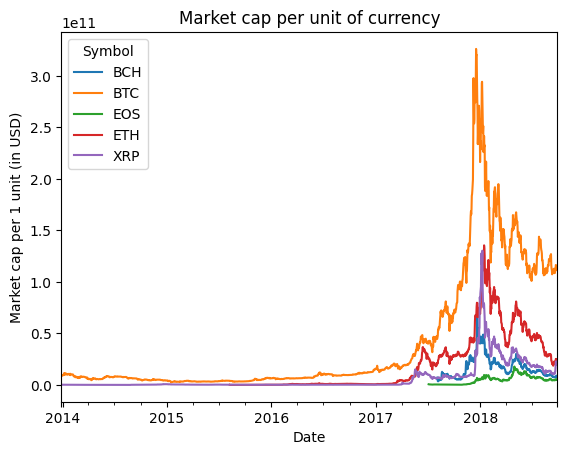

In [24]:
# Market cap per unit of top 5 currency
ax = top_5_currency_data.groupby(['Date', 'Symbol'])['Market Cap'].mean().unstack().plot();
ax.set_ylabel("Market cap per 1 unit (in USD)");
plt.title("Market cap per unit of currency");

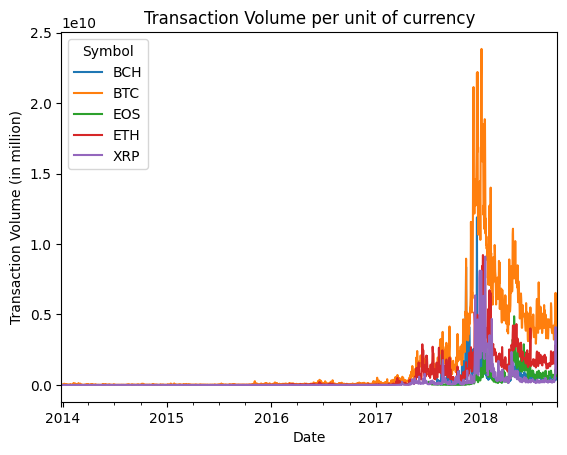

In [25]:
# Transaction volume per unit of top 5 currency
ax = top_5_currency_data.groupby(['Date', 'Symbol'])['Volume'].mean().unstack().plot();
ax.set_ylabel("Transaction Volume (in million)");
plt.title("Transaction Volume per unit of currency");

#Extracting the bitcoin data only

In [26]:
btc_df = df[df['Symbol'] == 'BTC']

In [27]:
btc_df.sample(5)

,Symbol,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2018-09-11,BTC,6331.88,6398.92,6260.21,6321.20,3.849910e+09,1.092932e+11
2017-11-26,BTC,8789.04,9522.93,8775.59,9330.55,5.475580e+09,1.467892e+11
2018-07-25,BTC,8379.66,8416.87,8086.36,8181.39,5.845400e+09,1.438690e+11
2017-05-19,BTC,1897.37,2004.52,1890.25,1987.71,1.157290e+09,3.099900e+10
2016-09-29,BTC,605.02,606.82,604.85,605.69,5.565860e+07,9.616160e+09


In [28]:
btc_df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [29]:
btc_df.shape

(1736, 7)

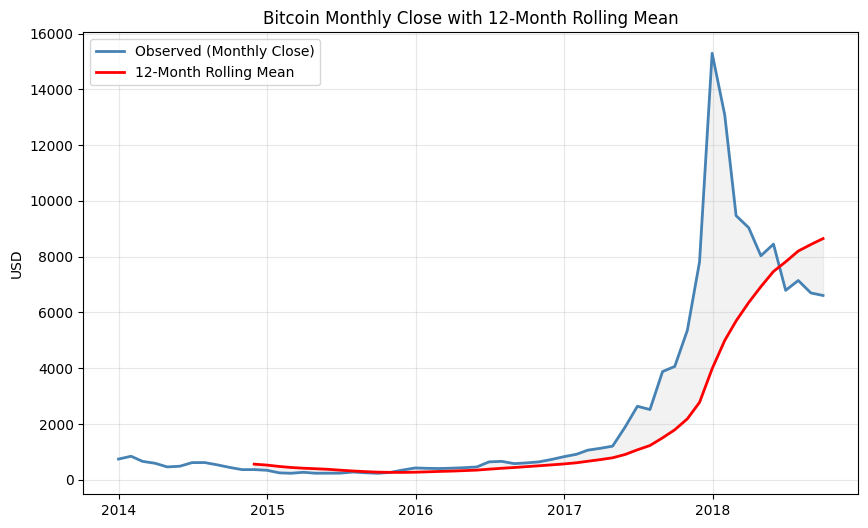

In [124]:
import matplotlib.pyplot as plt

# Compute rolling mean (for example, a 12-month moving average)
btc_month['rolling_mean_12'] = btc_month['Close'].rolling(window=12).mean()

# Plot original data and rolling mean
plt.figure(figsize=(10,6))
plt.plot(btc_month['Close'], label='Observed (Monthly Close)', color='steelblue', linewidth=2)
plt.plot(btc_month['rolling_mean_12'], label='12-Month Rolling Mean', color='red', linewidth=2)
plt.fill_between(btc_month.index,
                 btc_month['rolling_mean_12'],
                 btc_month['Close'],
                 color='gray', alpha=0.1)
plt.title('Bitcoin Monthly Close with 12-Month Rolling Mean')
plt.ylabel('USD')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


<Axes: title={'center': 'BTC Price chart'}, xlabel='Date'>

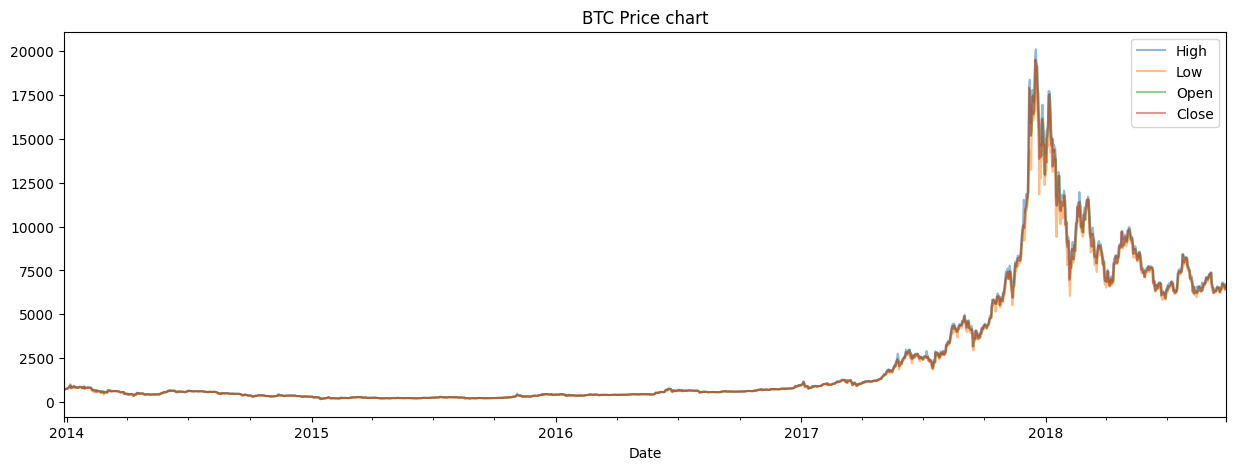

In [30]:
btc_df[['High','Low','Open','Close']].plot(figsize=(15,5),alpha=0.5,title='BTC Price chart')

#alpha controls the transparency of the lines in the plot. It ranges from:
# 0.0 → completely transparent (invisible)
# 1.0 → completely opaque (default)
# Each of the lines (High, Low, Open, Close) will be drawn at 50% transparency. This is useful when plotting multiple overlapping lines, so you can still see everything clearly
# and the plot doesn’t look cluttered.

The four had almost same behaviour throught time and nased on this assumption in this project we will only focus on one of them in order to build a model which could predict fututre values and then as possible suggestions extrapolate such model to other indicators. First we check the stationary and seasonality in the data.

#Stationary check and seasonal decomposition


If a timeseries is a stationary then it implies mean and variance are constant in time. This is a important step in timeseries analysis.
Seasonal decomposition is a method in statsmodel to decompose time series in the 4 components such as stationary, Trend, seasonal and residual.

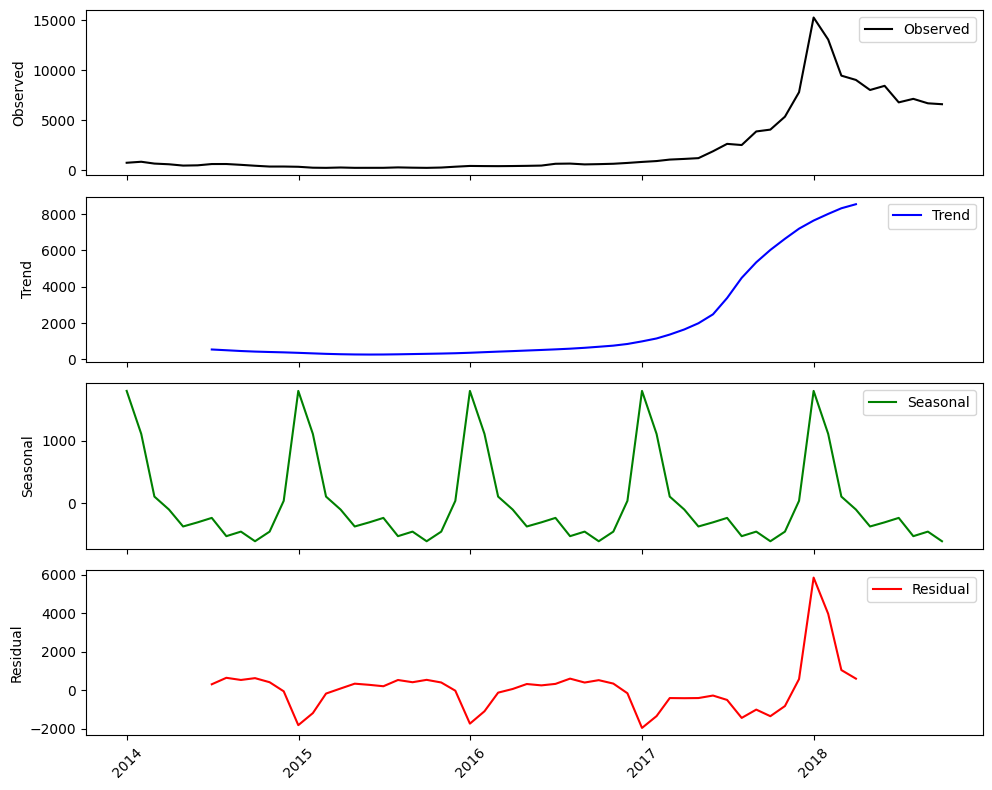

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose


from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure the DataFrame is sorted by date
btc_df = btc_df.sort_index()

# Resample to monthly Close prices and drop missing values
monthly_close = btc_df['Close'].resample('M').mean().dropna()

# Perform seasonal decomposition
result = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot full decomposition (trend, seasonal, residual)
# Original data
# Manually plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(monthly_close, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The seasonal commponent repeat after each year on a yearly basis. "There’s a repeating seasonal pattern every 12 periods.”

In [32]:
from statsmodels.tsa.stattools import adfuller


# Run ADF test on 'Close' prices
result = adfuller(monthly_close)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -1.1132507852845268
p-value: 0.7097588209543375
Critical Values:
   1%: -3.5506699942762414
   5%: -2.913766394626147
   10%: -2.5946240473991997


| Output              | Interpretation                                                                                                                                |
| ------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **ADF Statistic**   | The test statistic. Should be **less than** the critical value to reject the null hypothesis (i.e., detect stationarity).                     |
| **p-value**         | If **< 0.05**, the series is likely **stationary** (no unit root).                                                                            |
| **Critical Values** | Benchmarks at 1%, 5%, and 10% confidence levels. If ADF stat is **less than** these values, the null hypothesis (non-stationary) is rejected. |


📉 Interpretation
❌ The series is not stationary.

Why?

p-value = 0.6958 → much higher than 0.05 → fail to reject the null hypothesis (that the series has a unit root).

ADF Statistic = -1.1473, which is greater than all the critical values (1%, 5%, 10%).

So the test suggests monthly BTC Close prices are non-stationary — which is very common for financial time series (they usually have trends or seasonality).

#Autocorrelation factor(ACF) and partial autocorrelation factor(PACF)

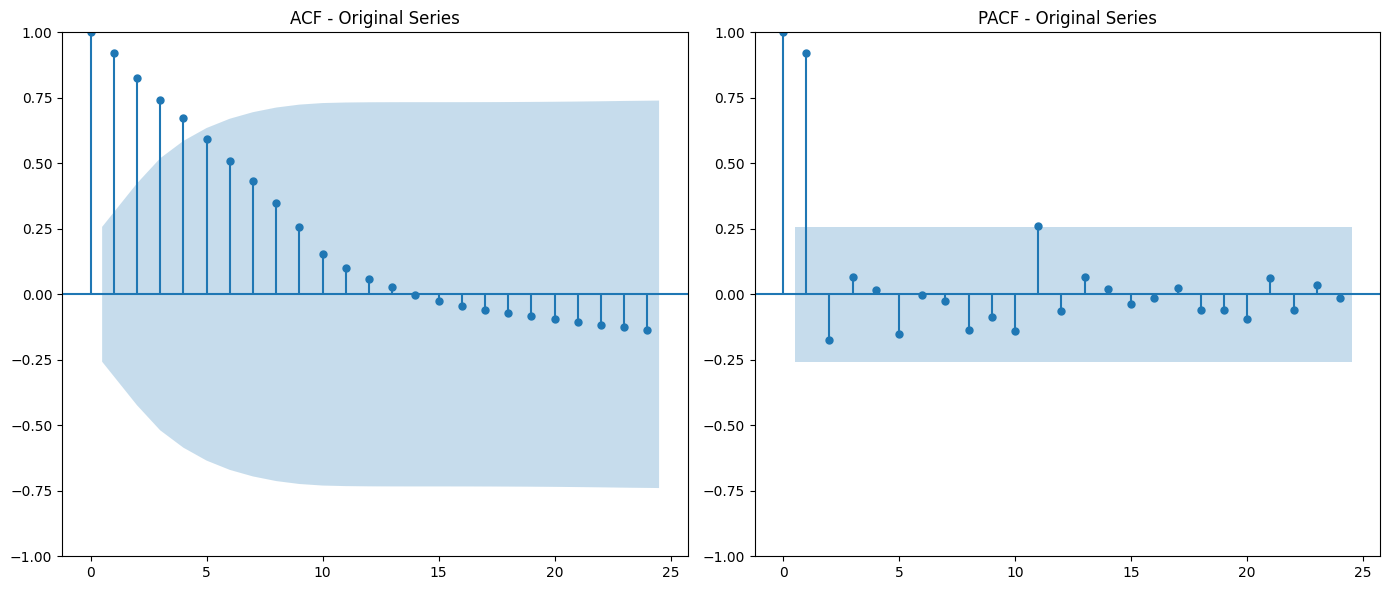

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Close (monthly resampled)
monthly_close = btc_df['Close'].resample('M').mean().dropna()

# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF plot
plot_acf(monthly_close, lags=24, ax=axes[0])
axes[0].set_title('ACF - Original Series')

# PACF plot
plot_pacf(monthly_close, lags=24, ax=axes[1], method='ywm')
axes[1].set_title('PACF - Original Series')

plt.tight_layout()
plt.show()





The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are essential tools for identifying ARIMA model parameters (p and q) and checking for autocorrelation in time series.
----
| Plot                                        | Meaning                                                                                             | Helps Identify   |
| ------------------------------------------- | --------------------------------------------------------------------------------------------------- | ---------------- |
| **ACF (Autocorrelation Function)**          | Shows correlation between a series and its lagged values (e.g., value vs. value one month ago)      | **MA (q)** terms |
| **PACF (Partial Autocorrelation Function)** | Shows correlation between a series and its lagged values *after removing* intermediate correlations | **AR (p)** terms |

-----
If ACF decays slowly → series is non-stationary → need differencing (d > 0).

If ACF cuts off after lag q → indicates an MA(q) process.

If PACF cuts off after lag p → indicates an AR(p) process.

If both die off quickly → series is likely white noise.

Each plot has:

Blue shaded area = 95% confidence interval

Vertical bars = correlation strength at each lag

➡️ If a bar extends beyond the blue area → significant autocorrelation (not random noise).



| Pattern in ACF / PACF                                | Interpretation                      | Possible Model                  |
| ---------------------------------------------------- | ----------------------------------- | ------------------------------- |
| **Slow decay in ACF**                                | Non-stationary (trend not removed)  | Apply differencing (`d=1`)      |
| **ACF cuts off after lag *q*** and PACF tails off    | MA(q) process                       | Moving Average model            |
| **PACF cuts off after lag *p*** and ACF tails off    | AR(p) process                       | Autoregressive model            |
| **Both decay quickly (within bounds)**               | White noise (no autocorrelation)    | No AR or MA terms needed        |
| **Repeating spikes at seasonal lags (12, 24, etc.)** | Seasonality (annual, monthly, etc.) | Add seasonal terms (P, D, Q, m) |



# Treating the non stationary : Applying the transformations


##a. 1st Differencing (This is the most common method. It subtract the previous value from the current value.)

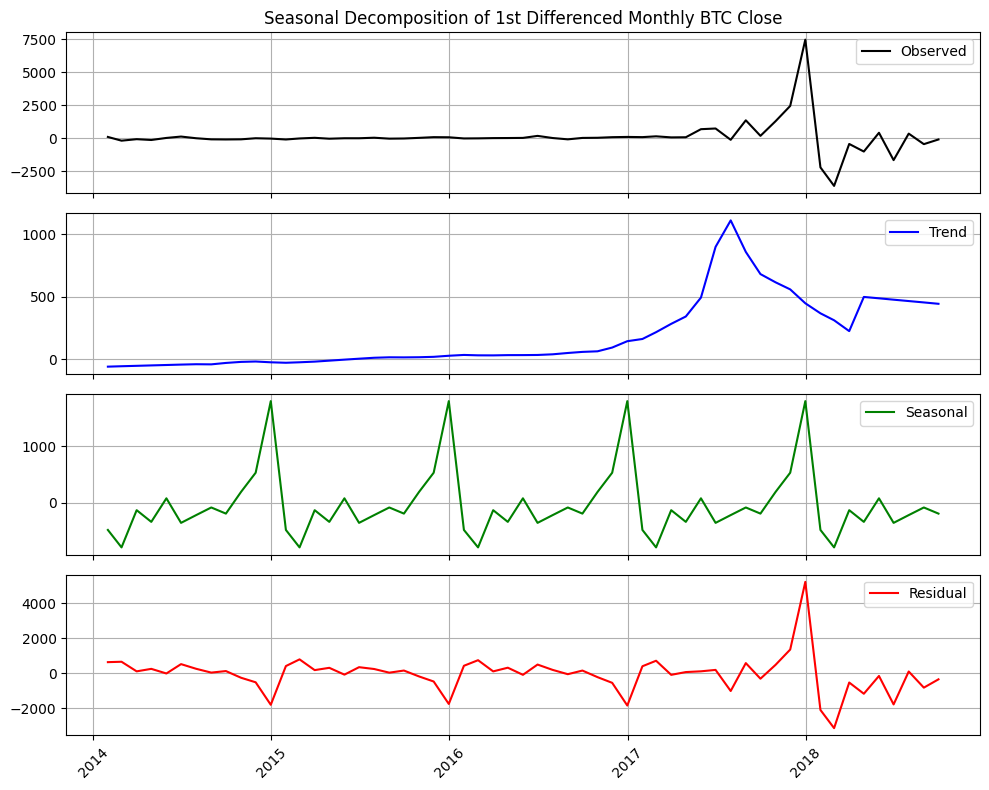

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np

# Resample to monthly mean
btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')

# 1st differencing
btc_month['Close_1diff'] = btc_month['Close'].diff() #First differencing for stationarity

# Seasonal decomposition (additive, yearly pattern)
result_1diff = seasonal_decompose(
    btc_month['Close_1diff'].dropna(),
    model='additive',
    period=12,
    extrapolate_trend='freq'
)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(btc_month['Close_1diff'], color='black', label='Observed')
axes[1].plot(result_1diff.trend, color='blue', label='Trend')
axes[2].plot(result_1diff.seasonal, color='green', label='Seasonal')
axes[3].plot(result_1diff.resid, color='red', label='Residual')

axes[0].set_title('Seasonal Decomposition of 1st Differenced Monthly BTC Close')

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
# Run ADF test on 'Close' prices
result_1diff = adfuller(btc_month['Close_1diff'].dropna())

# Print results
print('ADF Statistic:', result_1diff[0])
print('p-value:', result_1diff[1])
print('Critical Values:')
for key, value in result_1diff[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -6.304936406924587
p-value: 3.341408942477986e-08
Critical Values:
   1%: -3.552928203580539
   5%: -2.9147306250000002
   10%: -2.595137155612245


Interpretation:

The ADF test checks whether a time series is stationary (no unit root) or non-stationary (has trend or random walk behavior).

Null hypothesis (H₀): Series has a unit root → non-stationary

Alternative hypothesis (H₁): Series is stationary

Now:

Decision Rule:

If ADF Statistic < Critical Value → Reject H₀ → Stationary

If p-value < 0.05 → Reject H₀ → Stationary

Otherwise → Non-stationary

Autocorrelation factor(ACF) and partial autocorrelation factor(PACF) on 1st differencing

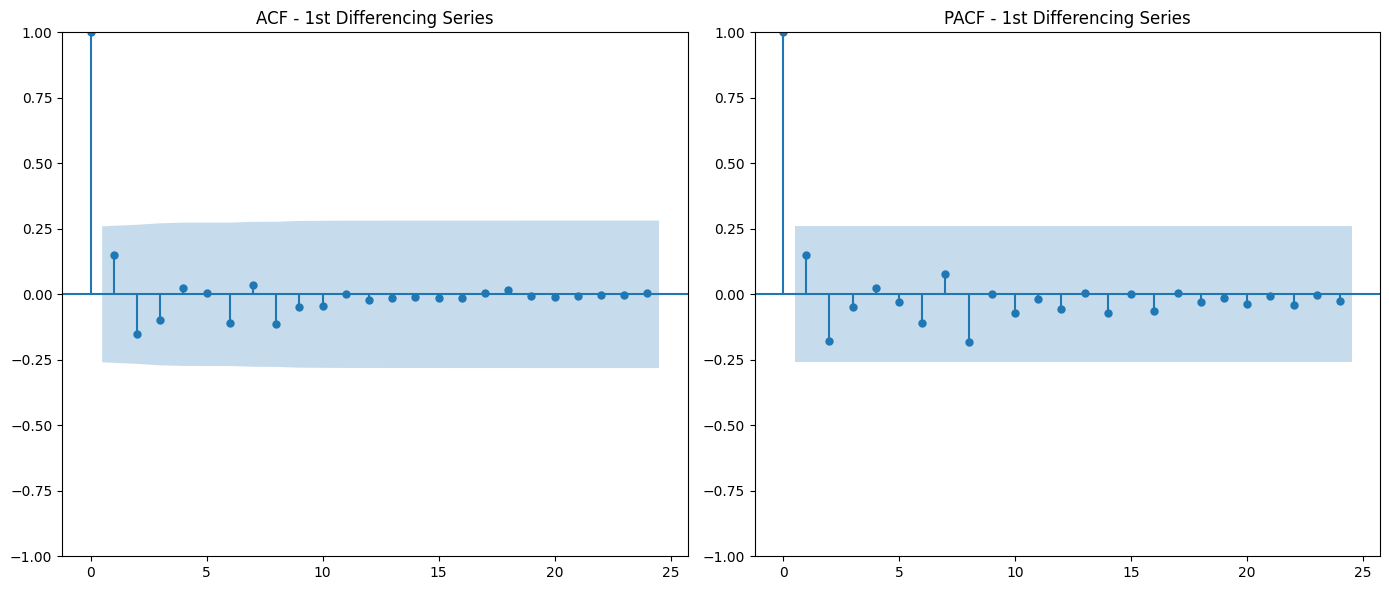

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF plot

plot_acf(btc_month['Close_1diff'].dropna(), lags=24, ax=axes[0])
axes[0].set_title('ACF - 1st Differencing Series')

# PACF plot
plot_pacf(btc_month['Close_1diff'].dropna(), lags=24, ax=axes[1], method='ywm')
axes[1].set_title('PACF - 1st Differencing Series')

plt.tight_layout()
plt.show()

#b. Boxcox Transformation

In [37]:
from scipy.stats import boxcox

btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')
# Box-Cox transform
btc_month['Close_boxcox'], lambda_ = boxcox(btc_month['Close'])
print("Optimal lambda:", lambda_)



# Re-run ADF test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(btc_month['Close_boxcox'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

Optimal lambda: -0.42747911777374326
ADF Statistic: -0.5197531748738723
p-value: 0.8881038148618086
   1%: -3.560242358792829
   5%: -2.9178502070837
   10%: -2.5967964150943397


#c. Boxcox Transformation + 1st differencing

The Box-Cox transformation is used to stabilize variance in a time series. Reduces heteroscedasticity (changing variance over time) and can improve model performance for ARIMA-like models.

Differencing is used to make a time series stationary in mean. Transforms a series with a trend into a stationary series, suitable for ARIMA modeling.

In [38]:
from scipy.stats import boxcox

btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')
# Box-Cox transform
btc_month['Close_boxcox'], lambda_ = boxcox(btc_month['Close'])
print("Optimal lambda:", lambda_)

# 1st differencing
btc_month['Close_boxcox_1diff'] = btc_month['Close_boxcox'].diff()

# Re-run ADF test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(btc_month['Close_boxcox_1diff'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

Optimal lambda: -0.42747911777374326
ADF Statistic: -2.9764502864997593
p-value: 0.037152944717842126
   1%: -3.560242358792829
   5%: -2.9178502070837
   10%: -2.5967964150943397


#d. Boxcox Transformation + 2nd differencing

In [39]:
from scipy.stats import boxcox

btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')
# Box-Cox transform
btc_month['Close_boxcox'], lambda_ = boxcox(btc_month['Close'])
print("Optimal lambda:", lambda_)

# 1st differencing
btc_month['Close_boxcox_1diff'] = btc_month['Close_boxcox'].diff()

# 2nd differencing
btc_month['Close_boxcox_2diff'] = btc_month['Close_boxcox_1diff'].diff()

# Re-run ADF test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(btc_month['Close_boxcox_2diff'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

Optimal lambda: -0.42747911777374326
ADF Statistic: -5.079033986063619
p-value: 1.5445655630755638e-05
   1%: -3.568485864
   5%: -2.92135992
   10%: -2.5986616


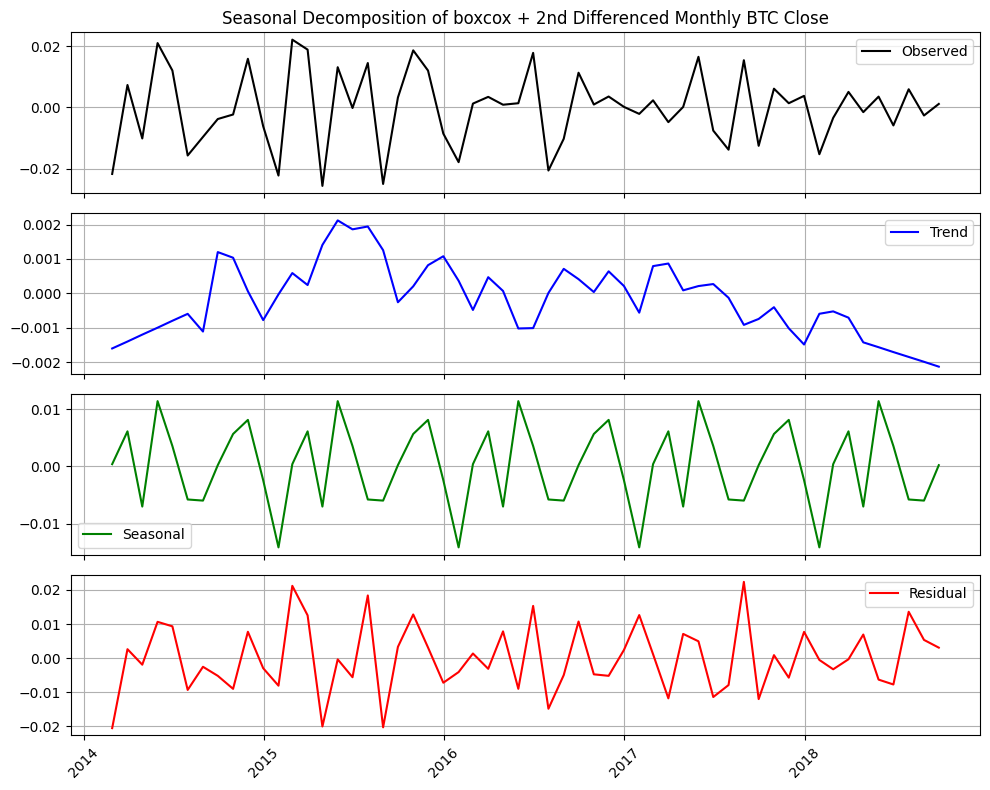

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np


# Seasonal decomposition (additive, yearly pattern)
result_1diff = seasonal_decompose(
    btc_month['Close_boxcox_2diff'].dropna(),
    model='additive',
    period=12,
    extrapolate_trend='freq'
)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(btc_month['Close_boxcox_2diff'], color='black', label='Observed')
axes[1].plot(result_1diff.trend, color='blue', label='Trend')
axes[2].plot(result_1diff.seasonal, color='green', label='Seasonal')
axes[3].plot(result_1diff.resid, color='red', label='Residual')

axes[0].set_title('Seasonal Decomposition of boxcox + 2nd Differenced Monthly BTC Close')

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This time series is stationalry now.

Autocorrelation factor(ACF) and partial autocorrelation factor(PACF) on boxcox+ 2nd differencing

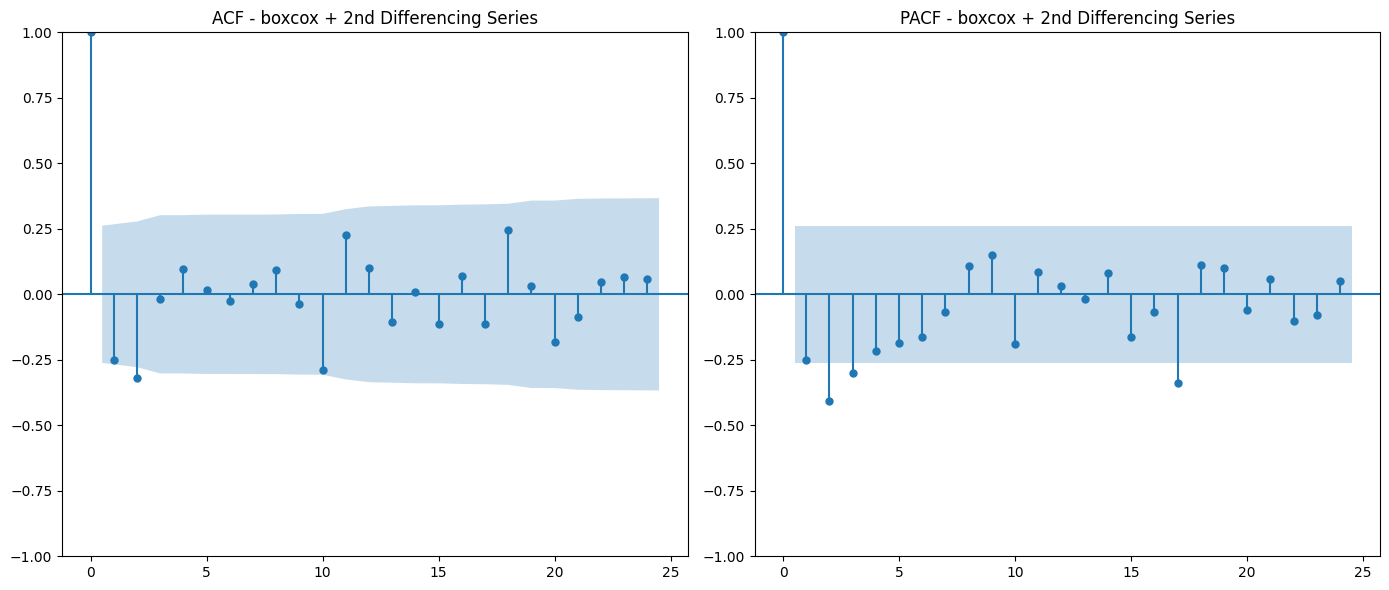

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF plot

plot_acf(btc_month['Close_boxcox_2diff'].dropna(), lags=24, ax=axes[0])
axes[0].set_title('ACF - boxcox + 2nd Differencing Series')

# PACF plot
plot_pacf(btc_month['Close_boxcox_2diff'].dropna(), lags=24, ax=axes[1], method='ywm')
axes[1].set_title('PACF - boxcox + 2nd Differencing Series')

plt.tight_layout()
plt.show()

#e. Log Transformation

In [42]:
btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')
btc_month['Close_log'] = np.log(btc_month['Close']) # Log transform to stabilize variance

# ADF test
adf_result = adfuller(btc_month['Close_log'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -0.08485775365092176
p-value: 0.9509260293006507
   1%: -3.552928203580539
   5%: -2.9147306250000002
   10%: -2.595137155612245


This time series is still nonstationalry, so we are doing first difference after log transformation.

#f. Log Transformation + 1st differencing

In [43]:
btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')
btc_month['Close_log'] = np.log(btc_month['Close']) # Log transform to stabilize variance
# 1st differencing
btc_month['Close_log_1diff'] = btc_month['Close_log'].diff()

# ADF test
adf_result = adfuller(btc_month['Close_log_1diff'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -5.380400516029586
p-value: 3.7235053258074284e-06
   1%: -3.552928203580539
   5%: -2.9147306250000002
   10%: -2.595137155612245


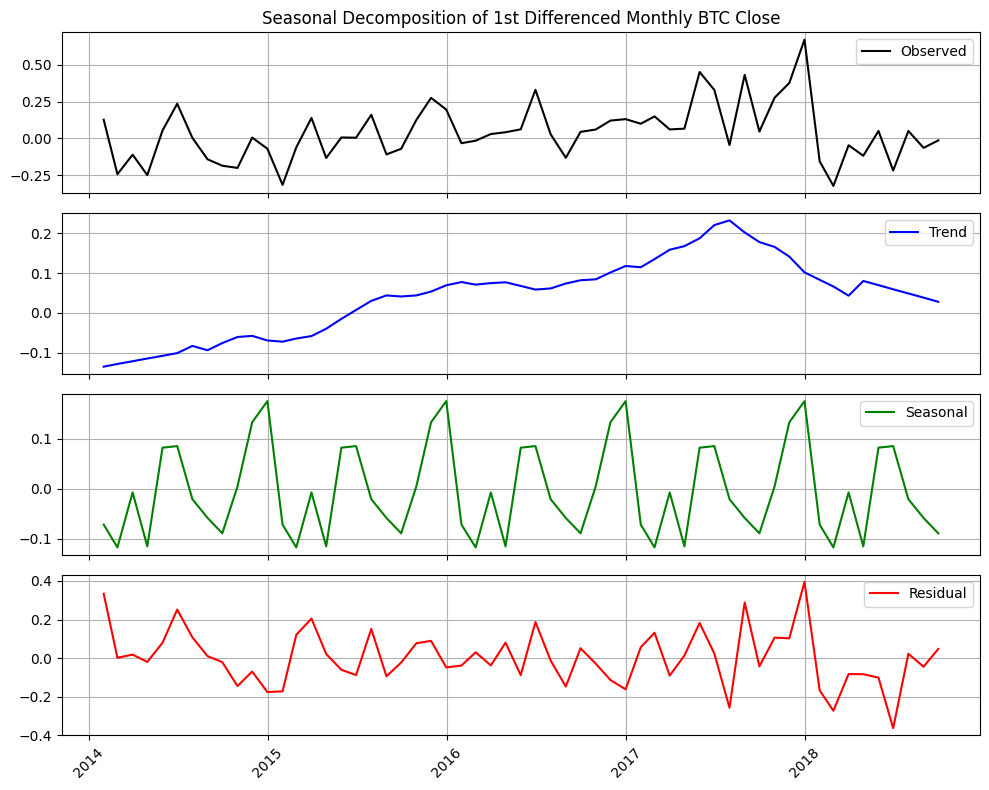

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np


# Seasonal decomposition (additive, yearly pattern)
result_1diff = seasonal_decompose(
    btc_month['Close_log_1diff'].dropna(),
    model='additive',
    period=12,
    extrapolate_trend='freq'
)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(btc_month['Close_log_1diff'], color='black', label='Observed')
axes[1].plot(result_1diff.trend, color='blue', label='Trend')
axes[2].plot(result_1diff.seasonal, color='green', label='Seasonal')
axes[3].plot(result_1diff.resid, color='red', label='Residual')

axes[0].set_title('Seasonal Decomposition of 1st Differenced Monthly BTC Close')

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Autocorrelation factor(ACF) and partial autocorrelation factor(PACF) on log+ 1st differencing

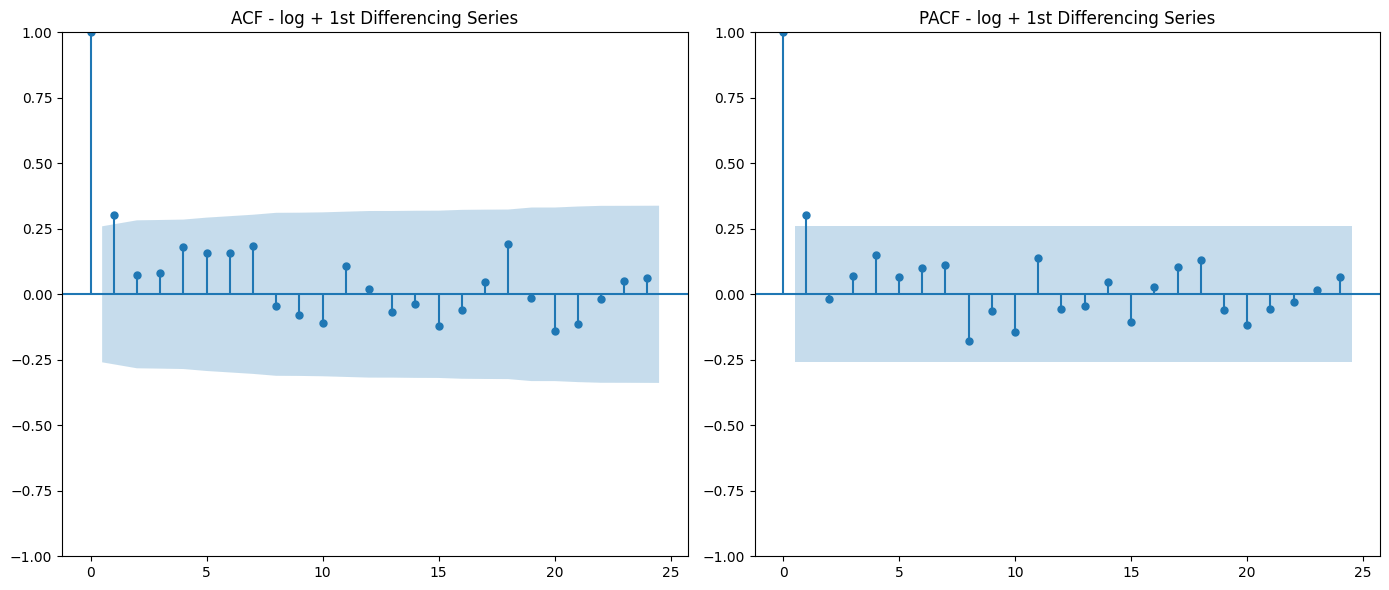

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF plot
plot_acf(btc_month['Close_log_1diff'].dropna(), lags=24, ax=axes[0])
axes[0].set_title('ACF - log + 1st Differencing Series')

# PACF plot
plot_pacf(btc_month['Close_log_1diff'].dropna(), lags=24, ax=axes[1], method='ywm')
axes[1].set_title('PACF - log + 1st Differencing Series')

plt.tight_layout()
plt.show()

Interpreting the boxcox+ 2nd differencing Bitcoin Data:

“ACF cuts off at lag 1, PACF tails off → MA(1) process”

“PACF cuts off at lag 1, ACF tails off → AR(1) process”

“No seasonal spikes → no seasonality”
---
This indicates that after log + differencing, conclusion:

ARIMA(1,1,0): AR(1) on differenced series (PACF may suggest 1 lag for AR, MA=0).

ARIMA(0,1,1): MA(1) on differenced series (ACF suggests 1 lags for MA, AR=0).

✅ Correct approach: fit both and compare AIC/BIC for the better model.
I can test both and compare AIC/BIC to see which fits best.

#ADF Test Comparison for Stationarity:



| Transformation             | Optimal Lambda | ADF Statistic | p-value  | 1% CV   | 5% CV   | 10% CV  | Stationary? | Interpretation                                                              |
| -------------------------- | -------------- | ------------- | -------- | ------- | ------- | ------- | ----------- | --------------------------------------------------------------------------- |
| 1st Differencing           | –              | -6.3049       | 3.34e-08 | -3.5529 | -2.9147 | -2.5951 | ✅ Yes         | Strong evidence against unit root; series is stationary.                    |
| Box–Cox                    | -0.4275        | -0.5198       | 0.8881   | -3.5602 | -2.9179 | -2.5968 | ❌ No         | p-value >> 0.05, cannot reject null; series is non-stationary.              |
| Box–Cox + 1st Differencing | -0.4275        | -2.9765       | 0.0372   | -3.5602 | -2.9179 | -2.5968 | ✅ Yes         | p-value < 0.05, series becomes stationary after differencing.               |
| Box–Cox + 2nd Differencing | -0.4275        | -5.0790       | 1.54e-05 | -3.5685 | -2.9214 | -2.5987 | ✅ Yes         | Strong evidence against unit root; series is stationary.                    |
| Log Transformation         | –              | -0.0849       | 0.9509   | -3.5529 | -2.9147 | -2.5951 | ❌ No          | p-value >> 0.05, series remains non-stationary.                             |
| Log + 1st Differencing     | –              | -5.3804       | 3.72e-06 | -3.5529 | -2.9147 | -2.5951 | ✅ Yes         | Strong evidence against unit root; series is stationary after differencing. |


We are selecting the Log + first differencing for model training.

#Monthly forecasting (Log Transformation + 1st differencing)

#ARIMA Model
AutoRegressive Integrated Moving Average
An ARIMA(p, d, q) model combines:

AR(p): autoregressive part — regression on past values

I(d): differencing to make the series stationary

MA(q): moving average part — regression on past forecast errors

For example,

ARIMA(1,1,0) → one AR term, one differencing, no MA

ARIMA(0,1,2) → no AR term, one differencing, two MA terms


#Parameter Selection

I will iteratively explore different combinations of ARIMA parameters. For each combination, I’ll fit a new model using the SARIMAX() function from statsmodels and evaluate its overall performance.

To compare models, I’ll use the Akaike Information Criterion (AIC) — a metric that balances model fit and complexity. The AIC rewards models that fit the data well but penalizes those that are unnecessarily complex. Therefore, the goal is to identify the model with the lowest AIC value, as it represents the best trade-off between goodness of fit and simplicity.

In [135]:
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

# Ensure the DataFrame is sorted by date
btc_df = btc_df.sort_index()
# Resample to monthly Close prices and drop missing values
btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')
# Log transformation
btc_month['Close_log'] = np.log(btc_month['Close'])
# 1st differencing
btc_month['Close_log_1diff'] = btc_month['Close_log'].diff()


# Define parameter ranges
p_values = [0, 1, 2]
d_values = [0]        # must be a list or iterable
q_values = [0, 1, 2]

# Generate all (p,d,q) combinations
parameters = list(product(p_values, d_values, q_values))

# Initialize results
results = []
best_aic_log_1diff = float("inf")
best_model_log_1diff = None
best_param_log_1diff = None

# Grid search over parameter combinations
for param in parameters:
    try:
        model = ARIMA(btc_month['Close_log_1diff'], order=param)
        fitted_model = model.fit()
        aic = fitted_model.aic
        results.append((param, aic))

        # Track best model
        if aic < best_aic_log_1diff:
            best_aic_log_1diff = aic
            best_model_log_1diff = fitted_model
            best_param_log_1diff = param

    except Exception as e:
        # Handle models that fail to converge
        print(f"Model {param} failed: {e}")
        continue

# Print best model summary
print(f"Best ARIMA parameters: {best_param_log_1diff}")
print(f"Best AIC: {best_aic_log_1diff:.2f}\n")
print(best_model_log_1diff.summary())

Best ARIMA parameters: (1, 0, 0)
Best AIC: -25.10

                               SARIMAX Results                                
Dep. Variable:        Close_log_1diff   No. Observations:                   58
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  15.551
Date:                Sat, 01 Nov 2025   AIC                            -25.102
Time:                        04:42:58   BIC                            -18.921
Sample:                    12-31-2013   HQIC                           -22.694
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0386      0.039      0.999      0.318      -0.037       0.114
ar.L1          0.2991      0.106      2.825      0.005       0.092       0.507
s

In [136]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters        aic
3  (1, 0, 0) -25.101898
1  (0, 0, 1) -24.941505
4  (1, 0, 1) -23.146382
2  (0, 0, 2) -23.134917
6  (2, 0, 0) -23.131165


| Parameters | AIC        | Interpretation                                                            |
| ---------- | ---------- | ------------------------------------------------------------------------- |
| (1,0,0)    | -25.101898 | **Best model** (lowest AIC). AR(1) process on the differenced log prices. |
| (0,0,1)    | -24.941505 | MA(1) model, slightly worse than AR(1).                                   |
| (1,0,1)    | -23.146382 | ARMA(1,1), higher AIC → less optimal.                                     |
| (0,0,2)    | -23.134917 | MA(2), not as good as AR(1).                                              |
| (2,0,0)    | -23.131165 | AR(2), worse than AR(1).                                                  |


✅ Key point:

(1,0,0) is your best ARIMA model for the log 1-differenced series.

d=0 because differencing was already applied manually.

we can now use this model to forecast, then reconstruct the original prices by cumulative sum + last log value, and finally exponentiate to invert the log.

Although the AIC (Akaike Information Criterion) is usually positive, it can sometimes appear as a negative value. This happens because the AIC is based on the model’s log-likelihood, which can be shifted by an arbitrary additive constant. Therefore, the absolute value of the AIC has no intrinsic meaning.

What truly matters are the relative differences in AIC values among competing models. The model with the lowest AIC is considered the best, as it provides the optimal balance between goodness of fit and model complexity.

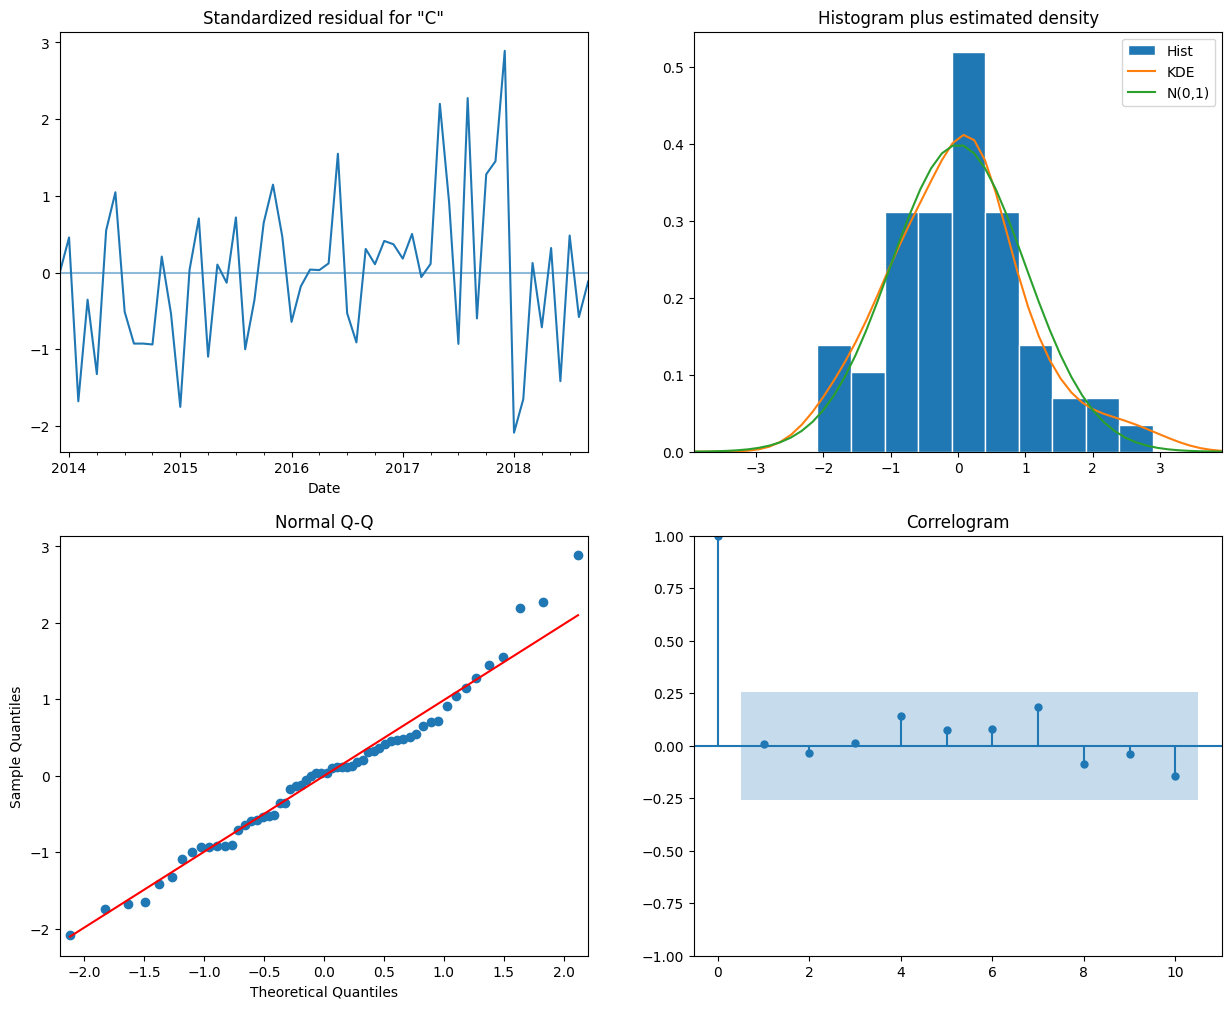

In [137]:
best_model_log_1diff.plot_diagnostics(figsize=(15, 12))
plt.show()

Interpretations:

----
1. Standardized Residuals Plot (Top Left): it shows Residuals (model errors) over time after standardization (mean ≈ 0, variance ≈ 1). Residuals is centered around zero — no clear upward or downward trend. Variance is constant over time (no “fanning out” or clustering of volatility).
No visible pattern → good.

Red flags:
Trend or cyclical structure → model didn’t capture all patterns.
Increasing or decreasing variance → heteroskedasticity problem.

----

2. Histogram plus KDE (Top Right): it shows Distribution of residuals, with a red KDE curve (estimated density) and a blue Normal(0,1) curve overlay. The red KDE line should closely follow the blue normal curve.
The histogram should be roughly symmetric and bell-shaped → residuals are normally distributed.

Red flags:
Skewed or heavy-tailed histogram → residuals not normal.
Peaks or multi-modal shape → non-linear patterns still exist.

----

3. Normal Q–Q Plot (Bottom Left): it shows Plots residual quantiles vs. theoretical normal quantiles. Points are lying close to the diagonal 45° line.
That means residuals are approximately normally distributed.

Red flags:
Curved or S-shaped pattern → skewness or heavy tails.
Outliers far from the line → abnormal error values.

----
4. Correlogram / ACF of Residuals (Bottom Right): it shows Autocorrelation of residuals at different lags (same as ACF plot but for residuals). Most spikes within the blue confidence band → residuals are uncorrelated (white noise).
The model has captured all time-dependent structure.

Red flags:
Significant spikes outside the band → residual autocorrelation → model can be improved (wrong p/q or seasonal order).



#Predictions for ARIMA Model (1,0,0)

In [138]:
#Prepare Monthly data
# For plotting later
btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')
btc_month['Close_log'] = np.log(btc_month['Close'])
btc_month['Close_log_diff'] = btc_month['Close_log'].diff()


In [139]:


print(btc_month['Close_log_diff'].head())



Date
2013-12-31         NaN
2014-01-31    0.126825
2014-02-28   -0.243663
2014-03-31   -0.110844
2014-04-30   -0.249661
Freq: ME, Name: Close_log_diff, dtype: float64


In [140]:
print(btc_month.head())
print(btc_month.tail())

                 Close  Close_log  Close_log_diff
Date                                             
2013-12-31  743.618000   6.611527             NaN
2014-01-31  844.168387   6.738352        0.126825
2014-02-28  661.618214   6.494689       -0.243663
2014-03-31  592.200323   6.383845       -0.110844
2014-04-30  461.362667   6.134184       -0.249661
                  Close  Close_log  Close_log_diff
Date                                              
2018-05-31  8450.997742   9.042040        0.050652
2018-06-30  6793.507667   8.823723       -0.218317
2018-07-31  7146.350000   8.874357        0.050634
2018-08-31  6700.130000   8.809882       -0.064475
2018-09-30  6609.207407   8.796219       -0.013663


In [141]:
# Forecast with your trained model
from datetime import datetime

forecast_diff = best_model_log_1diff.predict(
    start=datetime(2014, 1, 31),
    end=datetime(2018, 8, 31)
)

print("Forecast diff shape:", forecast_diff.shape)
print(forecast_diff.head())
print(forecast_diff.tail())



Forecast diff shape: (56,)
Date
2014-01-31    0.038592
2014-02-28    0.064979
2014-03-31   -0.045820
2014-04-30   -0.006099
2014-05-31   -0.047614
Freq: ME, Name: predicted_mean, dtype: float64
Date
2018-04-30    0.013108
2018-05-31   -0.008265
2018-06-30    0.042199
2018-07-31   -0.038240
2018-08-31    0.042193
Freq: ME, Name: predicted_mean, dtype: float64


In [142]:
print(forecast_diff.index.min(), forecast_diff.index.max())


2014-01-31 00:00:00 2018-08-31 00:00:00


In [143]:
#Identify the last known log value before the forecast starts (end of training).
last_log_value =btc_month['Close_log'].loc[:'2014-1-31'].iloc[-1]

print("Last log value:", last_log_value)


Last log value: 6.738351985474497


In [144]:
#Cumulate and add back that last value:
forecast_log = forecast_diff.cumsum() + last_log_value
forecast_log.index = pd.date_range('2014-01-31', periods=len(forecast_diff), freq='M')

print(forecast_log.head())
print(forecast_log.tail())


2014-01-31    6.776944
2014-02-28    6.841923
2014-03-31    6.796103
2014-04-30    6.790004
2014-05-31    6.742390
Freq: ME, Name: predicted_mean, dtype: float64
2018-04-30    8.903567
2018-05-31    8.895301
2018-06-30    8.937500
2018-07-31    8.899260
2018-08-31    8.941453
Freq: ME, Name: predicted_mean, dtype: float64


In [145]:
#Invert log transform
forecast_real = np.exp(forecast_log)
print(forecast_real.head())
print(forecast_real.tail())



2014-01-31    877.383321
2014-02-28    936.288008
2014-03-31    894.354987
2014-04-30    888.917076
2014-05-31    847.584080
Freq: ME, Name: predicted_mean, dtype: float64
2018-04-30    7358.171829
2018-05-31    7297.603781
2018-06-30    7612.143521
2018-07-31    7326.548844
2018-08-31    7642.295386
Freq: ME, Name: predicted_mean, dtype: float64


In [146]:
#Combine with historical monthly data
btc_month_pred = pd.concat([btc_month, pd.DataFrame({'forecast': forecast_real})], axis=1)
print(btc_month_pred.tail())


                  Close  Close_log  Close_log_diff     forecast
2018-05-31  8450.997742   9.042040        0.050652  7297.603781
2018-06-30  6793.507667   8.823723       -0.218317  7612.143521
2018-07-31  7146.350000   8.874357        0.050634  7326.548844
2018-08-31  6700.130000   8.809882       -0.064475  7642.295386
2018-09-30  6609.207407   8.796219       -0.013663          NaN


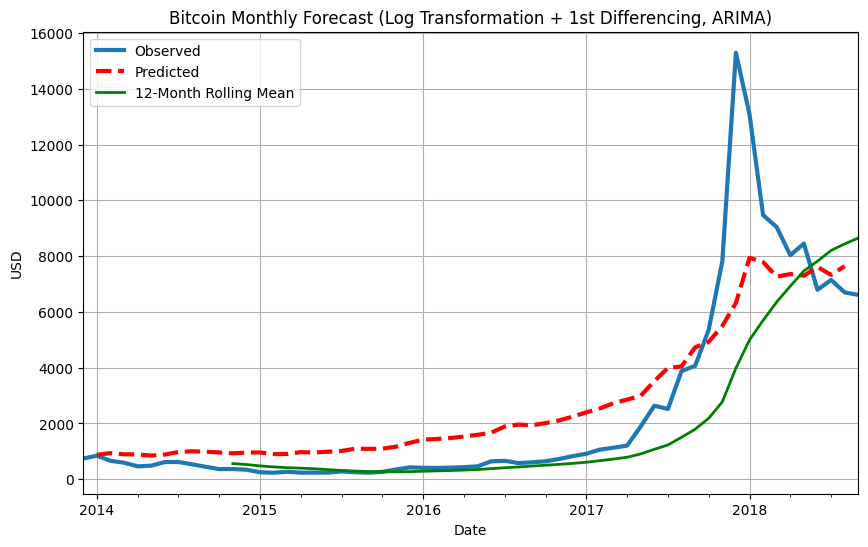

In [147]:

import matplotlib.pyplot as plt

# Calculate 12-month rolling mean for observed data
btc_month['Close_Rolling12'] = btc_month['Close'].rolling(window=12).mean()

plt.figure(figsize=(10,6))
btc_month['Close'].plot(linewidth=3, label='Observed')
btc_month_pred['forecast'].plot(color='r', ls='--', linewidth=3, label='Predicted')
btc_month['Close_Rolling12'].plot(color='g', ls='-', linewidth=2, label='12-Month Rolling Mean')
plt.legend()
plt.grid()
plt.title('Bitcoin Monthly Forecast (Log Transformation + 1st Differencing, ARIMA)')
plt.ylabel('USD')
plt.show()



In [148]:
#Final check
print("Last training log:", last_log_value)
print("First forecast log:", forecast_log.iloc[0])
print("First forecast price:", forecast_real.iloc[0])


Last training log: 6.738351985474497
First forecast log: 6.7769439790455
First forecast price: 877.3833210594964


Evaluate forecast accuracy

In [149]:
# Suppose your forecast period is from 2014-01-31 to 2018-08-31
forecast_index = pd.date_range('2014-01-31', '2018-08-31', freq='M')

# Extract actual observed prices for the same period
test = btc_month.loc[forecast_index, 'Close']

# Ensure forecast_real is a Pandas Series with the same index
forecast_real = pd.Series(forecast_real.values, index=forecast_index)

# Now compute MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast_real)
rmse = np.sqrt(mean_squared_error(test, forecast_real))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1126.007416228398
RMSE: 1707.5437657685413


Modelling using SARIMAX

In [164]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# -------------------------------------------------
# 1️⃣ Prepare data
# -------------------------------------------------
btc_df = btc_df.sort_index()

# Resample to monthly Close prices and drop missing values
btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')

# Log transform to stabilize variance
btc_month['Close_log'] = np.log(btc_month['Close'])

# Example exogenous variable: let's use trading volume or any numeric column
# Ensure exog variable is aligned with btc_month
btc_month['Volume_log'] = np.log(btc_df['Volume'].resample('M').mean().dropna() + 1)  # log-transform +1 to avoid log(0)
exog = btc_month[['Volume_log']]  # can include multiple columns

# -------------------------------------------------
# 2️⃣ Train-Test Split
# -------------------------------------------------
train_end = '2018-7-31'
train = btc_month['Close_log'][:train_end]
test = btc_month['Close_log'][:train_end]
#test = btc_month['Close_log'][train_end:]

exog_train = exog[:train_end]
exog_test = exog[:train_end]
#exog_test = exog[train_end:]

# -------------------------------------------------
# 3️⃣ Define parameter grids (non-seasonal and seasonal)
# -------------------------------------------------
p = d = q = range(0, 3)     # non-seasonal
pdq = list(product(p, d, q))

P = D = Q = range(0, 2)     # seasonal
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in product(P, D, Q)]  # s=12 for monthly

# -------------------------------------------------
# 4️⃣ Grid Search over (p,d,q) × (P,D,Q,12) with exogenous variable
# -------------------------------------------------
best_aic = float("inf")
best_param = None
best_seasonal_param = None
best_model = None

results = []

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train,
                            exog=exog_train,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=True,
                            enforce_invertibility=True)
            fitted_model = model.fit(method='lbfgs', disp=False)
            aic = fitted_model.aic
            results.append((param, seasonal_param, aic))

            if aic < best_aic:
                best_aic = aic
                best_param = param
                best_seasonal_param = seasonal_param
                best_model = fitted_model

        except Exception as e:
            print(f"Model {param} x {seasonal_param} failed: {e}")
            continue

# -------------------------------------------------
# 5️⃣ Print Best Model
# -------------------------------------------------
print("✅ Best SARIMAX parameters found with exogenous variables:")
print(f"Order (p,d,q): {best_param}")
print(f"Seasonal Order (P,D,Q,12): {best_seasonal_param}")
print(f"Best AIC: {best_aic:.2f}\n")

print(best_model.summary())

# -------------------------------------------------
# 6️⃣ Optional: Store results in DataFrame
# -------------------------------------------------
results_df = pd.DataFrame(results, columns=['(p,d,q)', '(P,D,Q,12)', 'AIC'])
results_df = results_df.sort_values('AIC')
print("\nTop 5 model configurations:")
print(results_df.head())

# -------------------------------------------------
# 7️⃣ Forecast on Test Set
# -------------------------------------------------
forecast = best_model.get_forecast(steps=len(test), exog=exog_test)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Display forecast
print("\nForecasted values:")
print(forecast_mean)


✅ Best SARIMAX parameters found with exogenous variables:
Order (p,d,q): (0, 1, 0)
Seasonal Order (P,D,Q,12): (0, 0, 0, 12)
Best AIC: -43.51

                               SARIMAX Results                                
Dep. Variable:              Close_log   No. Observations:                   56
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  23.754
Date:                Sat, 01 Nov 2025   AIC                            -43.509
Time:                        04:54:17   BIC                            -39.494
Sample:                    12-31-2013   HQIC                           -41.956
                         - 07-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume_log     0.2908      0.040      7.305      0.000       0.213  

✅ Best SARIMAX parameters found with exogenous variables:
Order (p,d,q): (0, 1, 0)
Seasonal Order (P,D,Q,12): (0, 0, 0, 12)
Best AIC: -39.87



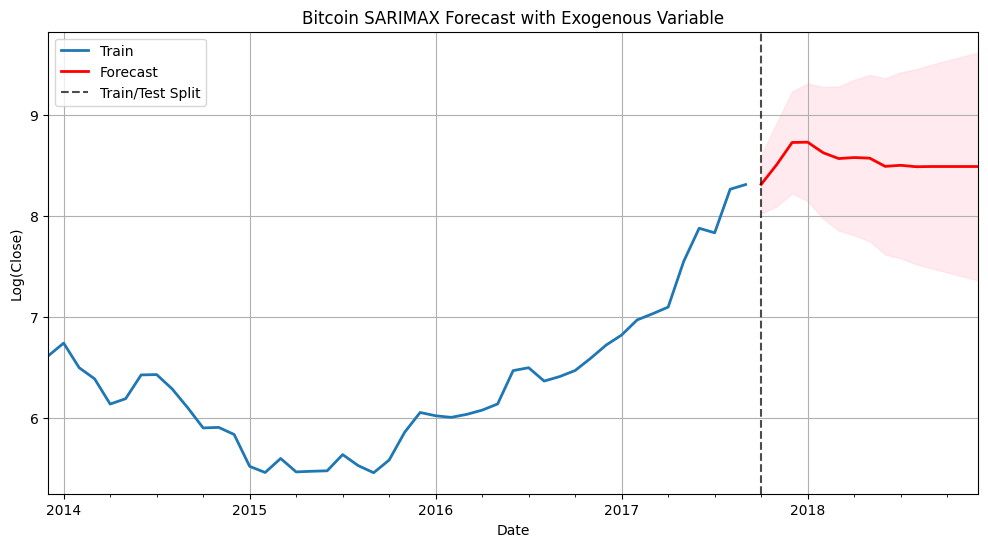

In [190]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# -------------------------------------------------
# 1️⃣ Prepare data
# -------------------------------------------------
btc_df = btc_df.sort_index()

# Resample to monthly Close prices and drop missing values
btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')

# Log transform to stabilize variance
btc_month['Close_log'] = np.log(btc_month['Close'])

# Exogenous variable example: trading volume (log transformed)
btc_month['Volume_log'] = np.log(btc_df['Volume'].resample('M').mean().dropna() + 1)
exog = btc_month[['Volume_log']]

# -------------------------------------------------
# 2️⃣ Train-Test Split (80%-20%)
# -------------------------------------------------
split_index = int(len(btc_month) * 0.8)

train = btc_month['Close_log'][:split_index]
test = btc_month['Close_log'][split_index:]

exog_train = exog[:split_index]
exog_test_overlap = exog[split_index:]  # overlapping test portion

# -------------------------------------------------
# 3️⃣ Define parameter grids
# -------------------------------------------------
p = d = q = range(0, 3)     # non-seasonal
pdq = list(product(p, d, q))

P = D = Q = range(0, 2)     # seasonal
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in product(P, D, Q)]  # s=12 for monthly

# -------------------------------------------------
# 4️⃣ Grid Search SARIMAX with exogenous variable
# -------------------------------------------------
best_aic = float("inf")
best_param = None
best_seasonal_param = None
best_model = None
results = []

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train,
                            exog=exog_train,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=True,
                            enforce_invertibility=True)
            fitted_model = model.fit(method='lbfgs', disp=False)
            aic = fitted_model.aic
            results.append((param, seasonal_param, aic))

            if aic < best_aic:
                best_aic = aic
                best_param = param
                best_seasonal_param = seasonal_param
                best_model = fitted_model
        except:
            continue

# -------------------------------------------------
# 5️⃣ Print Best Model
# -------------------------------------------------
print("✅ Best SARIMAX parameters found with exogenous variables:")
print(f"Order (p,d,q): {best_param}")
print(f"Seasonal Order (P,D,Q,12): {best_seasonal_param}")
print(f"Best AIC: {best_aic:.2f}\n")

# -------------------------------------------------
# 6️⃣ Forecast on Test + 3 Months Future
# -------------------------------------------------
future_steps = 3
forecast_steps = len(test) + future_steps

# Exogenous for overlapping test period
exog_overlap = exog_test_overlap

# Exogenous for future 3 months: repeat last known value
exog_future = pd.DataFrame(
    np.repeat(exog.iloc[-1].values.reshape(1, -1), future_steps, axis=0),
    columns=exog.columns,
    index=pd.date_range(start=btc_month.index[-1] + pd.offsets.MonthEnd(1), periods=future_steps, freq='M')
)

# Combine exog
exog_forecast = pd.concat([exog_overlap, exog_future])

forecast_index = pd.date_range(start=btc_month.index[split_index], periods=forecast_steps, freq='M')

forecast = best_model.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# -------------------------------------------------
# 7️⃣ Plot
# -------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
train.plot(label='Train', linewidth=2)
forecast_mean.plot(label='Forecast', color='r', linewidth=2)
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.axvline(x=btc_month.index[split_index], color='k', linestyle='--', alpha=0.7, label='Train/Test Split')
plt.title('Bitcoin SARIMAX Forecast with Exogenous Variable')
plt.ylabel('Log(Close)')
plt.legend()
plt.grid()
plt.show()


In [191]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'seasnoal parameters','aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

    parameters seasnoal parameters        aic
24   (0, 1, 0)       (0, 0, 0, 12) -39.874904
104  (1, 1, 1)       (0, 0, 0, 12) -39.701156
56   (0, 2, 1)       (0, 0, 0, 12) -38.972071
96   (1, 1, 0)       (0, 0, 0, 12) -38.954555
32   (0, 1, 1)       (0, 0, 0, 12) -38.734987


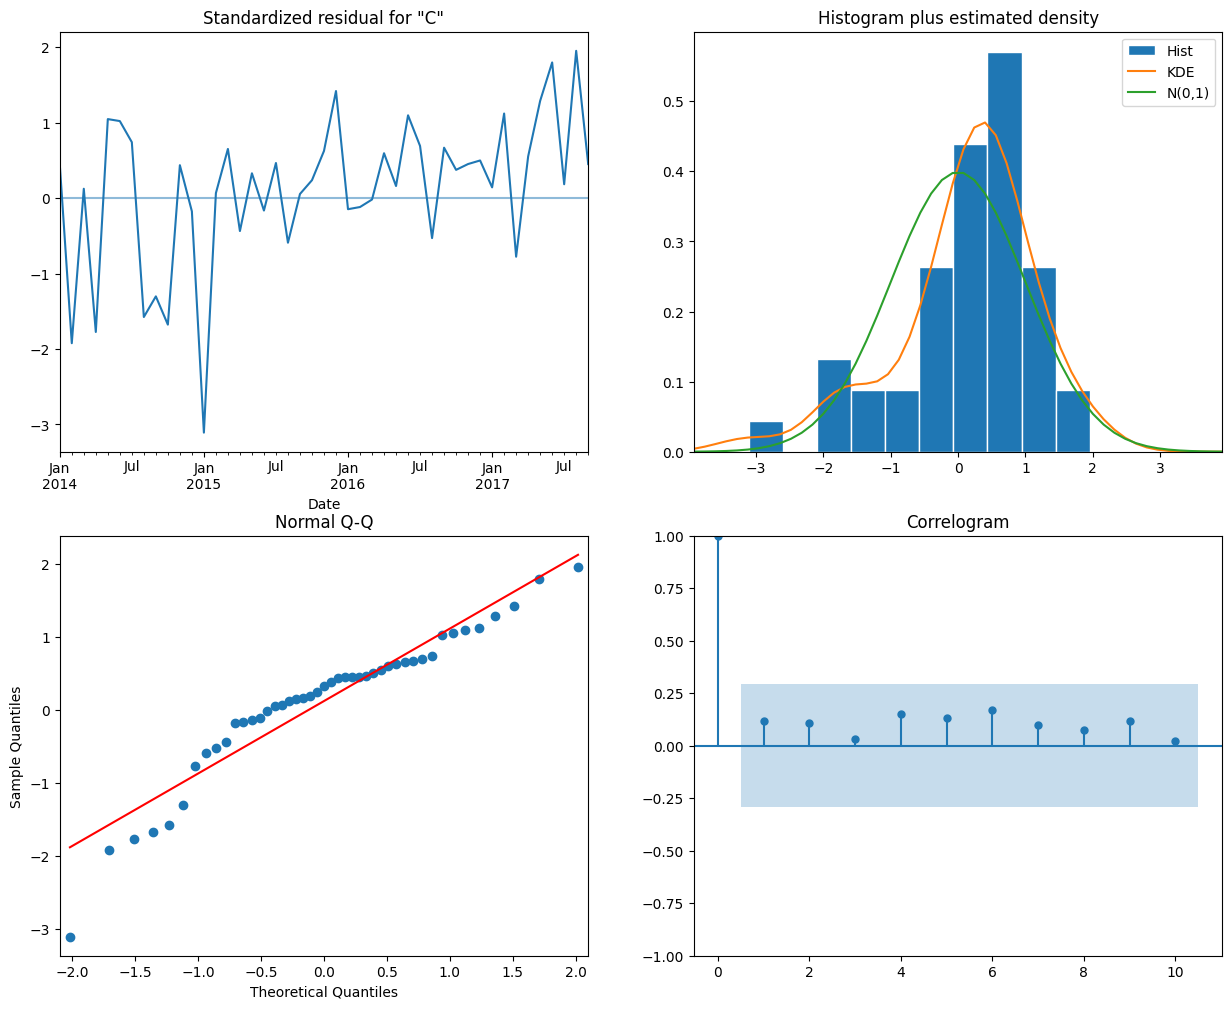

In [192]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [197]:
#Invert log transform
forecast_real = np.exp(forecast_mean)
print(forecast_real.head())
print(forecast_real.tail())

2017-10-31    4071.590697
2017-11-30    4949.212507
2017-12-31    6168.998451
2018-01-31    6187.767165
2018-02-28    5573.058116
Freq: ME, Name: predicted_mean, dtype: float64
2018-08-31    4850.714741
2018-09-30    4860.887913
2018-10-31    4860.887913
2018-11-30    4860.887913
2018-12-31    4860.887913
Freq: ME, Name: predicted_mean, dtype: float64


In [199]:
#Combine with historical monthly data
btc_month_pred = pd.concat([btc_month, pd.DataFrame({'forecast': forecast_real})], axis=1)
print(btc_month_pred.tail())

                  Close  Close_log  Volume_log  Close_Rolling12     forecast
2018-08-31  6700.130000   8.809882   22.174296      8437.917518  4850.714741
2018-09-30  6609.207407   8.796219   22.184161      8649.948441  4860.887913
2018-10-31          NaN        NaN         NaN              NaN  4860.887913
2018-11-30          NaN        NaN         NaN              NaN  4860.887913
2018-12-31          NaN        NaN         NaN              NaN  4860.887913


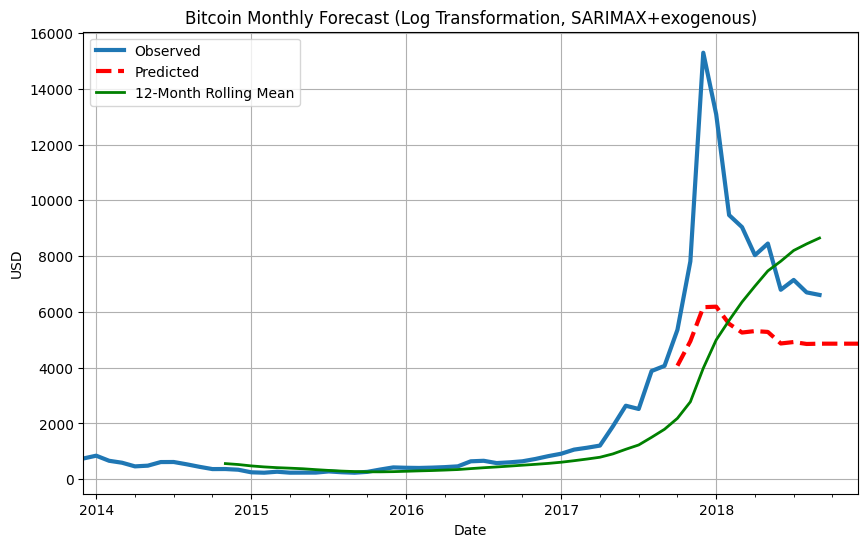

In [201]:
import matplotlib.pyplot as plt

# Calculate 12-month rolling mean for observed data
btc_month['Close_Rolling12'] = btc_month['Close'].rolling(window=12).mean()

plt.figure(figsize=(10,6))
btc_month['Close'].plot(linewidth=3, label='Observed')
btc_month_pred['forecast'].plot(color='r', ls='--', linewidth=3, label='Predicted')
btc_month['Close_Rolling12'].plot(color='g', ls='-', linewidth=2, label='12-Month Rolling Mean')
plt.legend()
plt.grid()
plt.title('Bitcoin Monthly Forecast (Log Transformation, SARIMAX+exogenous)')
plt.ylabel('USD')
plt.show()



#Modelling using boxcox+2nd differencing

In [69]:
from scipy.stats import boxcox

btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')
# Box-Cox transform
btc_month['Close_boxcox'], lambda_ = boxcox(btc_month['Close'])
print("Optimal lambda:", lambda_)

# 1st differencing
btc_month['Close_boxcox_1diff'] = btc_month['Close_boxcox'].diff()

# 2nd differencing
btc_month['Close_boxcox_2diff'] = btc_month['Close_boxcox_1diff'].diff()

Optimal lambda: -0.42747911777374326


In [70]:
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

# Ensure the DataFrame is sorted by date
btc_df = btc_df.sort_index()
btc_month = btc_df['Close'].resample('M').mean().dropna().to_frame(name='Close')
# Box-Cox transform
btc_month['Close_boxcox'], lambda_ = boxcox(btc_month['Close'])
print("Optimal lambda:", lambda_)

# 1st differencing
btc_month['Close_boxcox_1diff'] = btc_month['Close_boxcox'].diff()

# 2nd differencing
btc_month['Close_boxcox_2diff'] = btc_month['Close_boxcox_1diff'].diff()


# Define parameter ranges
p_values = [0, 1, 2]
d_values = [0]        # must be a list or iterable
q_values = [0, 1, 2]

# Generate all (p,d,q) combinations
parameters = list(product(p_values, d_values, q_values))

# Initialize results
results = []
best_aic_boxcox_2diff = float("inf")
best_model_boxcox_2diff = None
best_param_boxcox_2diff = None

# Grid search over parameter combinations
for param in parameters:
    try:
        model = ARIMA(btc_month['Close_boxcox_2diff'], order=param)
        fitted_model = model.fit()
        aic = fitted_model.aic
        results.append((param, aic))

        # Track best model
        if aic < best_aic_boxcox_2diff:
            best_aic_boxcox_2diff = aic
            best_model_boxcox_2diff = fitted_model
            best_param_boxcox_2diff = param

    except Exception as e:
        # Handle models that fail to converge
        print(f"Model {param} failed: {e}")
        continue

# Print best model summary
print(f"Best ARIMA parameters: {best_param_boxcox_2diff}")
print(f"Best AIC: {best_aic_boxcox_2diff:.2f}\n")
print(best_model_boxcox_2diff.summary())

Optimal lambda: -0.42747911777374326


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA parameters: (2, 0, 1)
Best AIC: -352.57

                               SARIMAX Results                                
Dep. Variable:     Close_boxcox_2diff   No. Observations:                   58
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 181.283
Date:                Sat, 01 Nov 2025   AIC                           -352.566
Time:                        03:27:21   BIC                           -342.264
Sample:                    12-31-2013   HQIC                          -348.553
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.26e-05      0.000      0.265      0.791      -0.000       0.001
ar.L1          0.1330      0.183      0.727      0.467      -0.225       0.491


In [71]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
7  (2, 0, 1) -352.566044
2  (0, 0, 2) -352.287557
1  (0, 0, 1) -350.922937
4  (1, 0, 1) -350.909125
5  (1, 0, 2) -350.225337


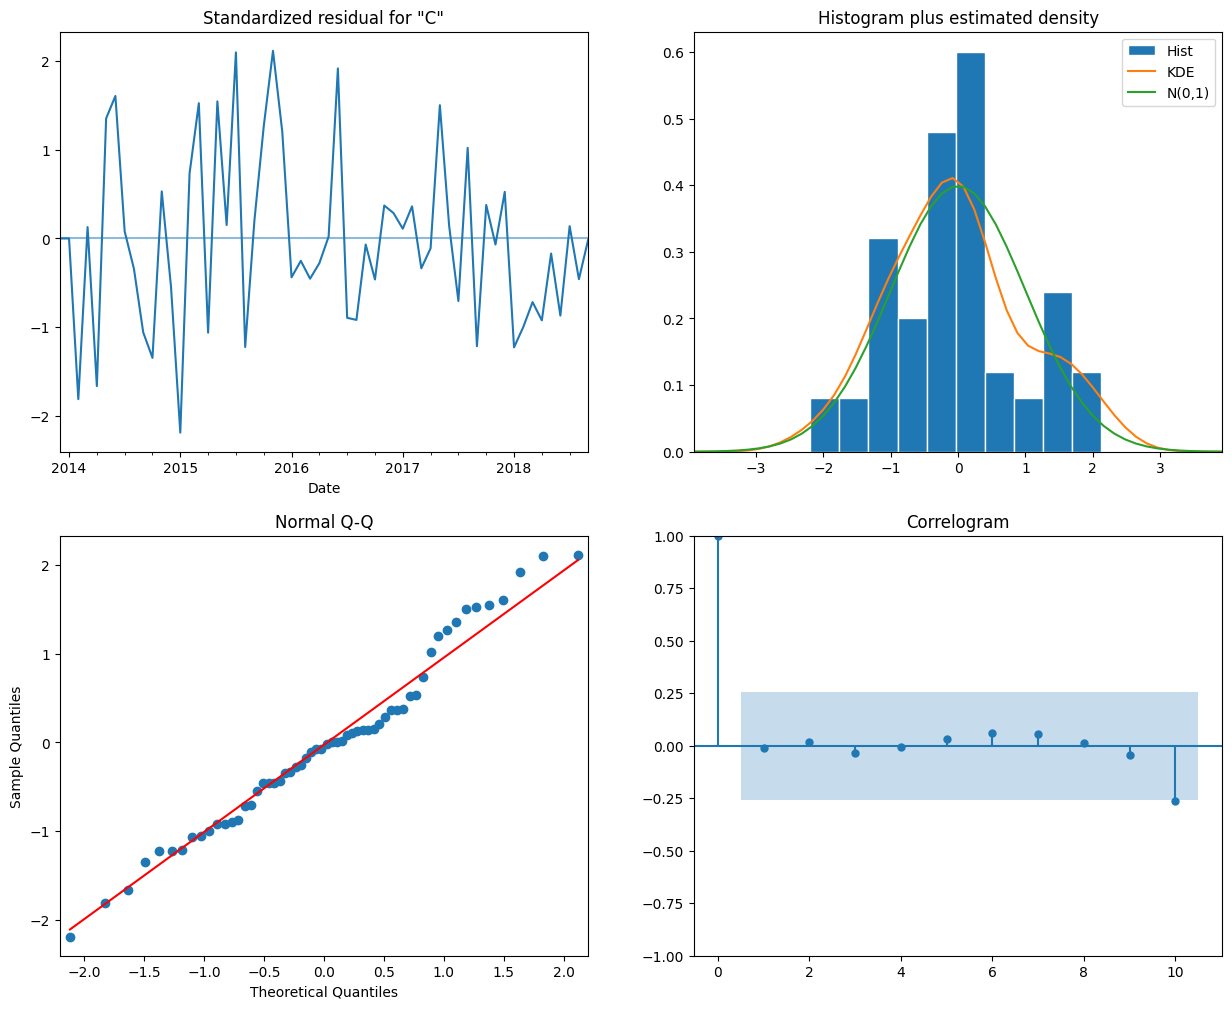

In [72]:
best_model_boxcox_2diff.plot_diagnostics(figsize=(15, 12))
plt.show()

Forecast

In [73]:
# Forecast with your trained model
from datetime import datetime

forecast_diff2 = best_model_boxcox_2diff.predict(
    start=datetime(2014, 1, 31),
    end=datetime(2018, 8, 31)
)

print("Forecast diff2 shape:", forecast_diff2.shape)
print(forecast_diff2.head())
print(forecast_diff2.tail())

Forecast diff2 shape: (56,)
Date
2014-01-31    0.000073
2014-02-28    0.000073
2014-03-31    0.005858
2014-04-30    0.007097
2014-05-31    0.007643
Freq: ME, Name: predicted_mean, dtype: float64
Date
2018-04-30    0.007149
2018-05-31    0.005141
2018-06-30    0.002300
2018-07-31    0.004647
2018-08-31    0.001688
Freq: ME, Name: predicted_mean, dtype: float64


In [74]:
#Reconstruct original Box-Cox series
# -------------------------------
# Step 1: Revert 2nd differencing → 1st differenced series
forecast_diff1 = forecast_diff2.cumsum() + btc_month['Close_boxcox_1diff'].iloc[-1]

# Step 2: Revert 1st differencing → original Box-Cox values
forecast_boxcox = forecast_diff1.cumsum() + btc_month['Close_boxcox'].iloc[-2]

forecast_boxcox.index = pd.date_range('2014-01-31', periods=len(forecast_diff), freq='M')


print(forecast_boxcox.head())
print(forecast_boxcox.tail())

2014-01-31    2.284911
2014-02-28    2.284740
2014-03-31    2.290426
2014-04-30    2.303209
2014-05-31    2.323636
Freq: ME, Name: predicted_mean, dtype: float64
2018-04-30    1.967932
2018-05-31    1.969477
2018-06-30    1.973321
2018-07-31    1.981813
2018-08-31    1.991993
Freq: ME, Name: predicted_mean, dtype: float64


In [75]:
#Invert boxcox transform
from scipy.special import inv_boxcox

forecast_real_boxcox = inv_boxcox(forecast_boxcox, lambda_)
forecast_real_boxcox= pd.Series(forecast_real, index=forecast_boxcox.index)

print(forecast_real_boxcox.head())
print(forecast_real_boxcox.tail())

2014-01-31    877.383321
2014-02-28    936.288008
2014-03-31    894.354987
2014-04-30    888.917076
2014-05-31    847.584080
Freq: ME, Name: predicted_mean, dtype: float64
2018-04-30    7358.171829
2018-05-31    7297.603781
2018-06-30    7612.143521
2018-07-31    7326.548844
2018-08-31    7642.295386
Freq: ME, Name: predicted_mean, dtype: float64


In [76]:
#Combine with historical monthly data
btc_month_pred_boxcox = pd.concat([btc_month['Close'], pd.DataFrame({'forecast_boxcox': forecast_real_boxcox})], axis=1)

print(btc_month_pred_boxcox.tail())

                  Close  forecast_boxcox
2018-05-31  8450.997742      7297.603781
2018-06-30  6793.507667      7612.143521
2018-07-31  7146.350000      7326.548844
2018-08-31  6700.130000      7642.295386
2018-09-30  6609.207407              NaN


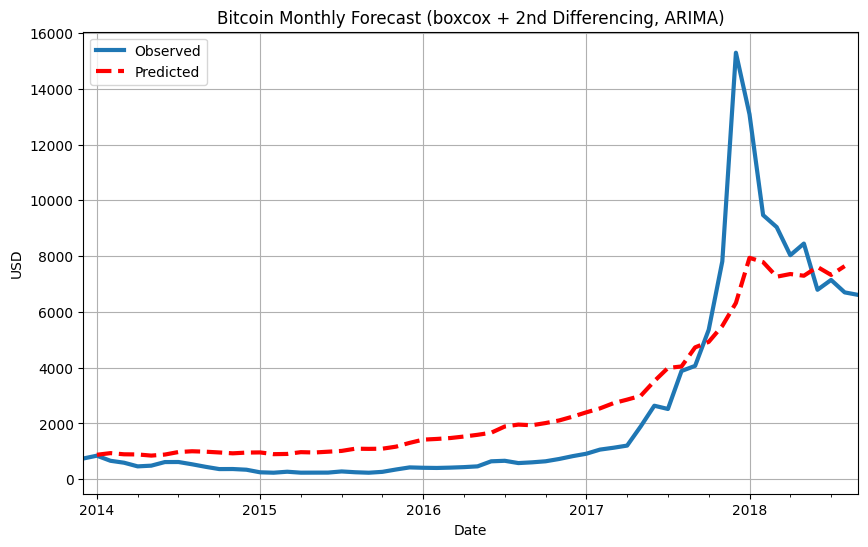

In [77]:
plt.figure(figsize=(10,6))
btc_month['Close'].plot(linewidth=3, label='Observed')
btc_month_pred_boxcox['forecast_boxcox'].plot(color='r', ls='--', linewidth=3, label='Predicted')
plt.legend()
plt.grid()
plt.title('Bitcoin Monthly Forecast (boxcox + 2nd Differencing, ARIMA)')
plt.ylabel('USD')
plt.show()


Evaluate forecast accuracy

In [78]:
# Suppose your forecast period is from 2014-01-31 to 2018-08-31
forecast_index = pd.date_range('2014-01-31', '2018-08-31', freq='M')

# Extract actual observed prices for the same period
test = btc_month.loc[forecast_index, 'Close']

# Ensure forecast_real is a Pandas Series with the same index
forecast_real_boxcox = pd.Series(forecast_real_boxcox.values, index=forecast_index)

# Now compute MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast_real_boxcox)
rmse = np.sqrt(mean_squared_error(test, forecast_real_boxcox))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1126.007416228398
RMSE: 1707.5437657685413


#Modelling usinng Neural Network (LSTM)

In [79]:
df_BTC = df.loc[df['Symbol'] == 'BTC',['Close']]
df_BTC.shape

(1736, 1)

In [80]:
train = df_BTC[:'2018'].values
valid = df_BTC['2018':].values


In [81]:
train.shape

(1736, 1)

In [82]:
valid.shape

(270, 1)

Feature engineering

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_BTC)

In [84]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [85]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [86]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [87]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=1)

Epoch 1/2
1676/1676 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - loss: 0.0036
Epoch 2/2
1676/1676 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - loss: 6.8267e-04


In [88]:
inputs = df_BTC[len(df_BTC) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [89]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [90]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [91]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

np.float64(761.6911990040502)

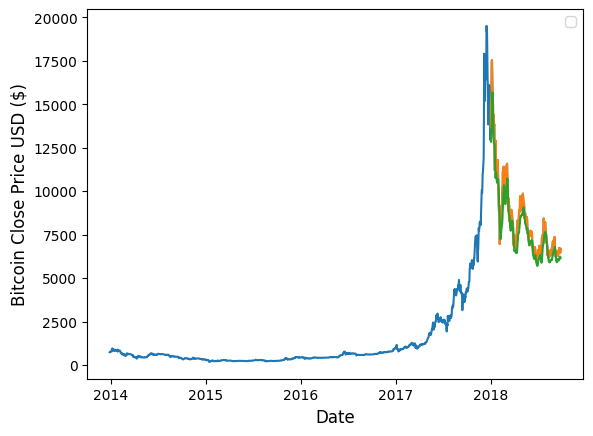

In [92]:
train = df_BTC[:'2018']
valid = df_BTC['2018':]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Bitcoin Close Price USD ($)',fontsize=12)
plt.legend()
plt.show()